In [1]:
import os
import re
import ast
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading Dataset

In [3]:
curr_dir = os.getcwd()
data_path = os.path.join(curr_dir, "Data", "data", "flipkart_com-ecommerce_sample.csv")
data_path

'c:\\Users\\sunny\\Desktop\\Home\\Projects\\Python\\ZEPTO-ASSIGNMENT\\ZEPTO_DS\\data\\flipkart_com-ecommerce_sample.csv'

In [4]:
df = pd.read_csv(data_path)
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

## Missing Values

In [6]:
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [ ]:
df[df['uniq_id'].isnull()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p> As you can see it is better to drop the above two rows. All the other columns containing null values are only partial nulls and we can use those columns.<p>

In [37]:
print(df.shape)
df = df[~df['uniq_id'].isnull()]
print(df.shape)

(20002, 15)
(20000, 15)


## Analyzing Columns

In [8]:
temp =  df.sample(10)
temp['product_category_tree'].values

array(['["Clothing >> Men\'s Clothing >> Winter & Seasonal Wear >> Sweatshirts >> Rodid Sweatshirts"]',
       '["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]',
       '["Clothing >> Men\'s Clothing >> T-Shirts >> Numalo T-Shirts"]',
       '["Baby Care >> Infant Wear >> Baby Boys\' Clothes >> Accessories >> Caps >> florence9 Caps >> florence9 baby cap red checks Cap"]',
       '["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Bras >> Madaam Bras"]',
       '["Jewellery >> Necklaces & Chains >> Necklaces"]',
       '["Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Engage Combos"]',
       '["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Bras >> Ploomz Bras"]',
       '["Clothing >> Women\'s Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Dewberries Tops"]',
       '["Sports & Fitness >> Fitness Accessories >> Accessories >> Yoga Blocks >> Gravolite Yoga Blocks >> Gravol

In [9]:
temp['product_specifications'].values

array(['{"product_specification"=>[{"key"=>"Knit Type", "value"=>"Fleece"}, {"key"=>"Sleeve", "value"=>"Full Sleeve"}, {"key"=>"Hooded", "value"=>"Yes"}, {"key"=>"Reversible", "value"=>"No"}, {"key"=>"Fabric", "value"=>"Cotton"}, {"key"=>"Pockets", "value"=>"Kangaroo Pockets at Front"}, {"key"=>"Neck", "value"=>"Round Neck"}, {"key"=>"Pattern", "value"=>"Solid"}, {"key"=>"Occasion", "value"=>"Casual"}, {"key"=>"Ideal For", "value"=>"Men\'s"}, {"value"=>"1 Sweatshirt"}, {"key"=>"Other Details", "value"=>"This Sweatshirt is available in 5 colors ."}, {"key"=>"Style Code", "value"=>"HWSSWTZ-NB"}, {"value"=>"wash similar colors together."}]}',
       '{"product_specification"=>[{"key"=>"Shape", "value"=>"Rectangle"}, {"key"=>"Brand", "value"=>"VGreen"}, {"key"=>"Model Number", "value"=>"VG157 - Rectangular Planter Big"}, {"key"=>"Type", "value"=>"Decorative, Outdoor"}, {"key"=>"Material", "value"=>"Plastic"}, {"key"=>"Color", "value"=>"Brown"}, {"key"=>"Sales Package", "value"=>"2"}, {"key

## Metadata of columns

1) **uniq_id**: This column represents a unique identifier for each product in the dataset. It is a unique and non-repeating value that can be used to identify each product record.

2) **crawl_timestamp**: This column contains the timestamp (date and time) when the data for the product was collected or "crawled" from the Flipkart website.

3) **product_url**: This column contains the URL or web address of the product page on the Flipkart website.

4) **product_name**: This column contains the name or title of the product as displayed on the Flipkart website.

5) **product_category_tree**: This column represents the hierarchical category structure to which the product belongs on the Flipkart platform. It may contain multiple levels of categories separated by a delimiter '>>'.

6) **pid**: This column represents the product ID or identifier used by Flipkart to uniquely identify the product.

7) **retail_price**: This column contains the original or list price of the product before any discounts or offers are applied.

8) **discounted_price**: This column represents the final price of the product after any applicable discounts or offers have been applied.

9) **image**: This column contains the URL or link to the primary product image displayed on the Flipkart website.

10) **is_FK_Advantage_product**: This column is a boolean flag indicating whether the product is part of the Flipkart Advantage program, which offers additional benefits or guarantees to customers.

11) **description**: This column contains the detailed product description or information as displayed on the Flipkart website.

12) **product_rating**: This column represents the average customer rating or review score for the product, typically on a scale of 1 to 5 stars.

13) **overall_rating**: This column contains the overall or composite rating for the product, which may incorporate factors beyond just the customer rating.

14) **brand**: This column specifies the brand or manufacturer of the product.

15) **product_specifications**: This column contains the detailed technical or feature-related specifications of the product, which may include attributes like fabric size, quantity, quality and other relevant details.

## Analyzing the Product categories and their Frequencies

In [10]:
category_data = df['product_category_tree'].values

# Extract unique categories
categories = []
for cat_str in category_data:
    cat_list = eval(cat_str)
    cat_list = ''.join(cat_list).split(">>")[0].strip()
    categories.append(cat_list)
category_counts = Counter(categories)
print(f"Number of categories: {len(category_counts)}")

Number of categories: 265


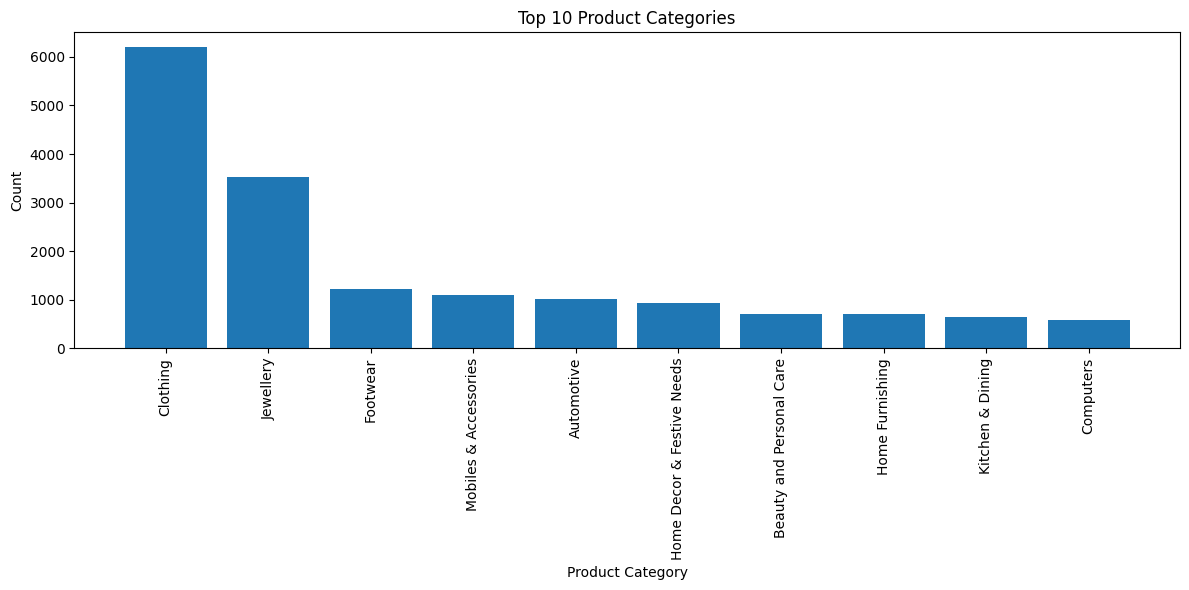

In [11]:
# Sort the categories by frequency in descending order
sorted_categories = sorted(category_counts.items(), key = lambda x : x[1], reverse = True)

# Get the top 10 categories
top_categories = [cat[0] for cat in sorted_categories[:10]]
top_counts = [cat[1] for cat in sorted_categories[:10]]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_categories, top_counts)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Top 10 Product Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<p> Categories are not balanced <p>

## Price of products

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_price,19922.0,2979.206104,9009.639341,35.0,666.0,1040.0,1999.0,571230.0
discounted_price,19922.0,1973.401767,7333.586040,35.0,350.0,550.0,999.0,571230.0


* Half of the products are around 1040/-, while the maximum price of a product is 5,71,230/-

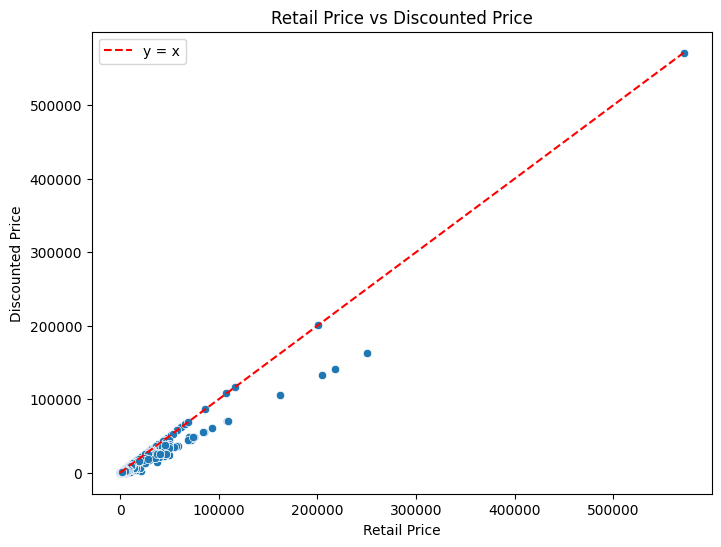

In [13]:
fig, ax = plt.subplots(figsize = (8, 6))

# Scatter plot of retail price vs. discounted price
sns.scatterplot(x = 'retail_price', y = 'discounted_price', data = df, ax = ax)

# Add the line y = x
max_price = max(df['retail_price'].max(), df['discounted_price'].max())
ax.plot([0, max_price], [0, max_price], color = 'red', linestyle = '--', label = 'y = x')

# Set the title and axis labels
ax.set_title('Retail Price vs Discounted Price')
ax.set_xlabel('Retail Price')
ax.set_ylabel('Discounted Price')
ax.legend()

plt.show()

<p> There's not much difference at lower prices, but as the prices increase there is difference between retail and discounted prices. <p> 

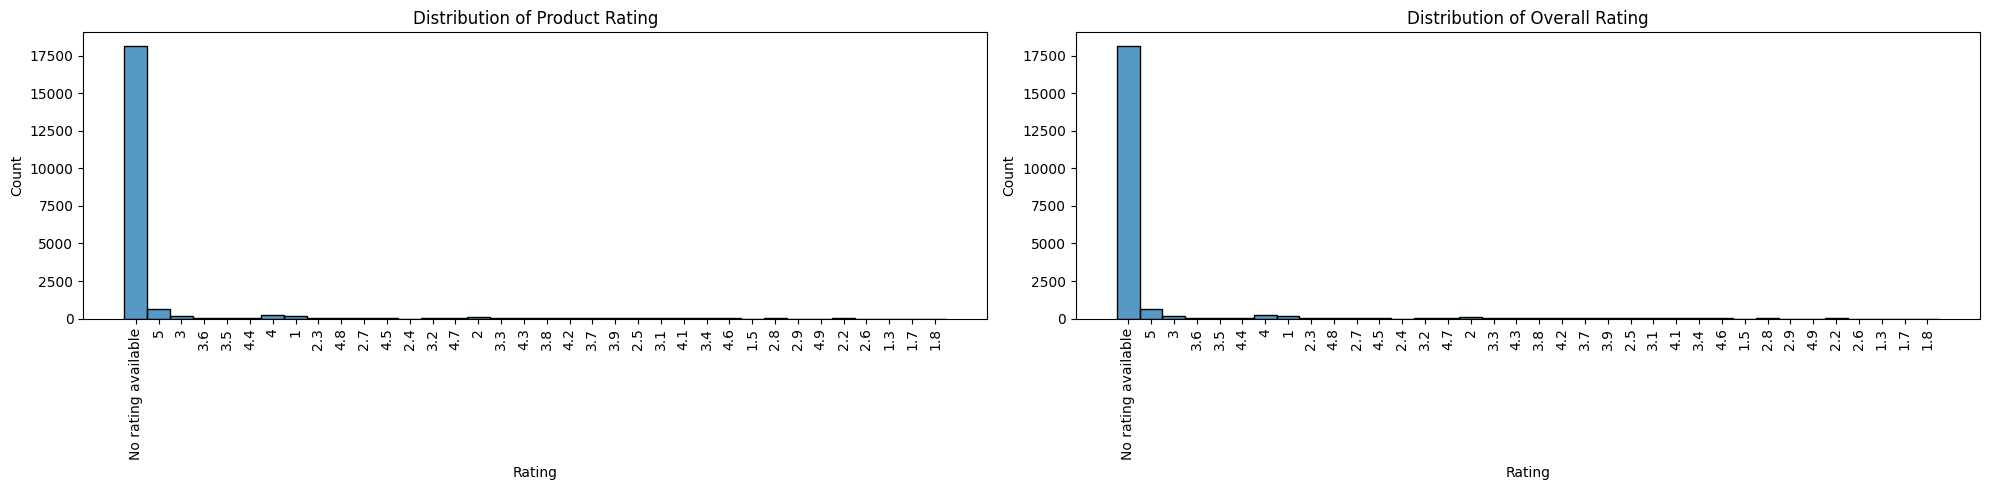

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

# Product rating distribution
sns.histplot(df['product_rating'], ax = ax[0])
ax[0].set_title('Distribution of Product Rating')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')
plt.setp(ax[0].get_xticklabels(), rotation = 90)

# Overall rating distribution
sns.histplot(df['overall_rating'], ax = ax[1])
ax[1].set_title('Distribution of Overall Rating')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Count')
plt.setp(ax[1].get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()

<p> For most of the rows, rating information is not available. For those rows, which are available the distribution is roughly same <p>

## Text Preprocessing

In [15]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [52]:
useful_text_cols = df[['uniq_id', 'product_name', 'product_category_tree', 'description', 'brand', 'product_specifications']]
useful_text_cols

,uniq_id,product_name,product_category_tree,description,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [53]:
useful_text_cols.iloc[0]['product_specifications']

'{"product_specification"=>[{"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 3"}, {"key"=>"Fabric", "value"=>"Cotton Lycra"}, {"key"=>"Type", "value"=>"Cycling Shorts"}, {"key"=>"Pattern", "value"=>"Solid"}, {"key"=>"Ideal For", "value"=>"Women\'s"}, {"value"=>"Gentle Machine Wash in Lukewarm Water, Do Not Bleach"}, {"key"=>"Style Code", "value"=>"ALTHT_3P_21"}, {"value"=>"3 shorts"}]}'

In [54]:
# Function to convert the product_specifications to the desired format, like "Occasion - Casual, Ideal For - Women, ... and so on

def convert_specifications(spec):
    try: 
        # Convert the string to a dictionary
        spec_dict = ast.literal_eval(spec.replace("=>", ":"))
        key_value_pairs = []
        for item in spec_dict['product_specification']:
            if isinstance(item, dict):  # Ensure item is a dictionary
                key = item.get('key')
                value = item.get('value')
                if key and value:
                    key_value_pairs.append(f"{key} - {value}")
                elif value:  # handle cases where only 'value' is present
                    key_value_pairs.append(f"{value}")
            else:
                continue
        
        # Join all pairs into a single string
        return ", ".join(key_value_pairs)
    except:
        return np.nan  # Return NaN if the spec is not a string


useful_text_cols['formatted_specifications'] = useful_text_cols['product_specifications'].apply(convert_specifications)

C:\Users\sunny\AppData\Local\Temp\ipykernel_477608\3242117560.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_text_cols['formatted_specifications'] = useful_text_cols['product_specifications'].apply(convert_specifications)


In [55]:
useful_text_cols.iloc[0]['formatted_specifications']

"Number of Contents in Sales Package - Pack of 3, Fabric - Cotton Lycra, Type - Cycling Shorts, Pattern - Solid, Ideal For - Women's, Gentle Machine Wash in Lukewarm Water, Do Not Bleach, Style Code - ALTHT_3P_21, 3 shorts"

In [56]:
# category_data = df['product_category_tree'].values

# Extract unique categories

def convert_product_tree(cat_str):
    try:
        cat_list = eval(cat_str)
        cat_list = ''.join(cat_list).strip()
        cat_list = cat_list.replace('>>', '-')
        return cat_list
    except:
        return np.nan
    
useful_text_cols['formatted_category_tree'] = useful_text_cols['product_category_tree'].apply(convert_product_tree)

# for cat_str in category_data:
#     cat_list = eval(cat_str)
#     cat_list = ''.join(cat_list).split(">>")[0].strip()
#     categories.append(cat_list)
# category_counts = Counter(categories)
# print(f"Number of categories: {len(category_counts)}")

C:\Users\sunny\AppData\Local\Temp\ipykernel_477608\4148952009.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_text_cols['formatted_category_tree'] = useful_text_cols['product_category_tree'].apply(convert_product_tree)


In [57]:
useful_text_cols.iloc[0]['formatted_category_tree']

"Clothing - Women's Clothing - Lingerie, Sleep & Swimwear - Shorts - Alisha Shorts - Alisha Solid Women's Cycling Shorts"

In [58]:
useful_text_cols['text_col'] = (
    useful_text_cols['product_name'].fillna('') + " " + 
    useful_text_cols['description'].fillna('') + " " +  
    useful_text_cols['formatted_category_tree'].fillna('') + " " +  
    useful_text_cols['formatted_specifications'].fillna('') + " " + 
    useful_text_cols['brand'].fillna('')
)

C:\Users\sunny\AppData\Local\Temp\ipykernel_477608\1253379326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_text_cols['text_col'] = (


In [59]:
useful_text_cols.iloc[20]['text_col']

'Sicons Conditioning Conditoner Dog Shampoo Specifications of Sicons Conditioning Conditoner Dog Shampoo (200 ml) General Pet Type Dog Brand Sicons Quantity 200 ml Model Number SH.DF-02 Type Conditioning Fragrance Conditoner Form Factor Gel In the Box Sales Package Shampoo Sicons Dog Fashion Conditioner Aloe Rinse Pet Supplies - Grooming > Skin & Coat Care - Shampoo - Sicons Conditioning Conditoner Dog Shampoo (200 ml) Pet Type - Dog, Brand - Sicons, Quantity - 200 ml, Model Number - SH.DF-02, Type - Conditioning, Fragrance - Conditoner, Form Factor - Gel, Sales Package - Shampoo Sicons Dog Fashion Conditioner Aloe Rinse Sicons'

In [60]:
def preprocess_string(text):
    try:
        # 1. Lowercase everything
        text = text.lower()
        
        # 2. Remove HTML tags
        text = re.sub('<[^>]+>', '', text)
        
        # 3. Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        
        # 4. Remove stopwords
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
        
        # 5. Stemming
        # stemmer = PorterStemmer()
        # text = ' '.join([stemmer.stem(word) for word in text.split()])
        
        return text
    except:
        return np.nan

useful_text_cols['text_col'] = useful_text_cols['text_col'].apply(preprocess_string)

C:\Users\sunny\AppData\Local\Temp\ipykernel_477608\2321943828.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_text_cols['text_col'] = useful_text_cols['text_col'].apply(preprocess_string)


In [61]:
useful_text_cols.isnull().sum()

uniq_id                        0
product_name                   0
product_category_tree          0
description                    2
brand                       5864
product_specifications        14
formatted_specifications      67
formatted_category_tree        0
text_col                       0
dtype: int64

In [67]:
temp = useful_text_cols.sample(10)
temp['text_col']

18527    zsupport senior monopod walking polo stick 36 ...
2448     luxemburg bandaeu womens tube bra luxemburg ba...
10731    decot paradise printed kurti patiyala key feat...
19287    lovely plastic desk chair specifications lovel...
11983    madhyam art brass brass bangle set madhyam art...
6859     ela acrylic necklace ela acrylic necklace buy ...
12543    itrendz womens printed casual shirt itrendz wo...
18595    leading lady womens camisole key features lead...
7424     park avenue 8 edp cool blue deodorant combo se...
15832    jjc lh37 lens hood buy jjc lh37 lens hood rs 1...
Name: text_col, dtype: object

In [70]:
useful_text_cols.loc[100]['text_col']

'rorlig rr028 expedition analog watch men boys rorlig rr028 expedition analog watch men boys price rs 399 bombarded complimenting glances walk wearing brownblack coloured analog watch featuring stylish dial attractive leather strap watch classy touch look stylish accessory fine pick flaunt casuals well formals bombarded complimenting glances walk wearing brownblack coloured analog watch featuring stylish dial attractive leather strap watch classy touch look stylish accessory fine pick flaunt casuals well formals watches wrist watches rorlig wrist watches chronograph altimeter date display barometer alarm clock compass calendar luminous type analog series expedition style code rr028 occasion formal casual partywedding sports ideal men boys novelty feature stylish designed power source battery powered 1 years manufacturers warranty box material plastic dial shape round strap color brown scratch resistant yes water resistant yes dial color black watch'

In [75]:
id_to_text_df = useful_text_cols[['uniq_id', 'text_col']]
id_to_text_df.to_csv("preprocessed_text.csv", index = False)

## Image column processing

In [79]:
def process_image_link(l):
    try:
        l = eval(l)
        return l
    except:
        print(l)
        return np.nan

df['image_new'] = df['image'].apply(process_image_link)

nan
nan
nan


In [81]:
id_to_image_df = df[['uniq_id', 'image_new']]
id_to_image_df.to_csv("id2img.csv", index = False)